In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dating_data = pd.read_csv("Speed Dating Data.csv",
                         encoding="ISO-8859-1")

Our questions do not vary by waves, so we are using the most data that we can (i.e. using all waves and only dropping missing value rows)

In [14]:
# get last and first dates for each iid

dating_data_order_min = dating_data[['iid', 'order']].groupby('iid').min()
dating_data_order_max = dating_data[['iid', 'order']].groupby('iid').max()

In [15]:
# number of unique iids
len(dating_data['iid'].unique())

551

In [16]:
dating_data = dating_data.merge(dating_data_order_min, how='left', on='iid', suffixes=('', '_min'))
dating_data = dating_data.merge(dating_data_order_max, how='left', on='iid', suffixes=('', '_max'))


In [36]:
first_dec = dating_data.loc[dating_data['order'] == dating_data['order_min']]
last_dec = dating_data.loc[dating_data['order'] == dating_data['order_max']]

In [37]:
first_dec = first_dec.loc[~first_dec['dec'].isna()]
last_dec = last_dec.loc[~last_dec['dec'].isna()]


In [41]:
a = len(first_dec[(first_dec['dec'] == 0)].index)
b = len(first_dec[(first_dec['dec'] == 1)].index)

c = len(last_dec[(last_dec['dec'] == 0)].index)
d = len(last_dec[(last_dec['dec'] == 1)].index)

print(a,b)
print(c,d)
contingency_table = np.array([[a,b],[c,d]])

276 275
302 249


In [42]:
from scipy import stats
stats.chi2_contingency(contingency_table)

(2.274062970495787,
 0.1315546143800287,
 1,
 array([[289., 262.],
        [289., 262.]]))

In [43]:
data_gender0 = dating_data.loc[dating_data['gender'] == 0]
data_gender1 = dating_data.loc[dating_data['gender'] == 1]

In [44]:
a = len(data_gender0[(data_gender0['dec'] == 0)].index)
b = len(data_gender0[(data_gender0['dec'] == 1)].index)

c = len(data_gender1[(data_gender1['dec'] == 0)].index)
d = len(data_gender1[(data_gender1['dec'] == 1)].index)

print(a,b)
print(c,d)
contingency_table = np.array([[a,b],[c,d]])

2655 1529
2205 1989


In [45]:
stats.chi2_contingency(contingency_table)

(101.35647890703936,
 7.683349889046882e-24,
 1,
 array([[2427.09954643, 1756.90045357],
        [2432.90045357, 1761.09954643]]))

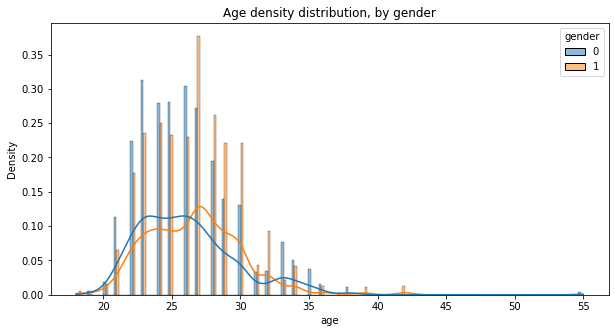

In [49]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dating_data, x="age",
             kde=True, stat='density', hue="gender", 
             common_norm=False, multiple="dodge")
plt.title("Age density distribution, by gender")
plt.show()

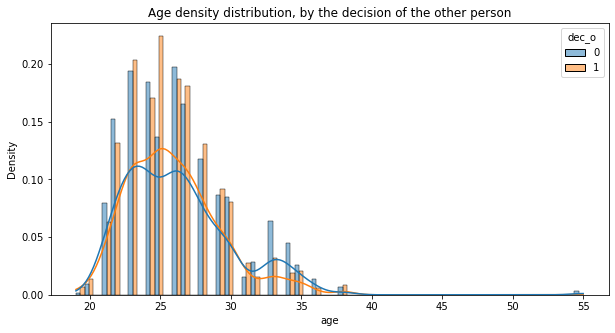

In [53]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data_gender0, x="age",
             kde=True, stat='density', hue="dec_o", 
             common_norm=False, multiple="dodge")
plt.title("Age density distribution, by the decision of the other person, females")
plt.show()

In [59]:
x1 = data_gender0.loc[data_gender0['dec_o']==0, 'age'].to_numpy()
x2 = data_gender0.loc[data_gender0['dec_o']==1, 'age'].to_numpy()
stats.kstest(x1,x2)

KstestResult(statistic=0.05161700603038375, pvalue=0.0073453166292272165)

In [61]:
x1 = data_gender1.loc[data_gender1['dec_o']==0, 'age'].to_numpy()
x2 = data_gender1.loc[data_gender1['dec_o']==1, 'age'].to_numpy()
stats.kstest(x1,x2)

KstestResult(statistic=0.032779643588557436, pvalue=0.24069266935942824)

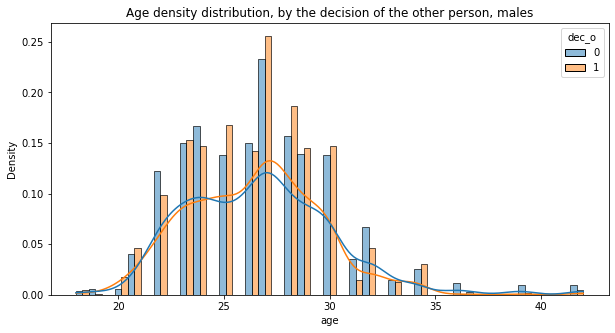

In [54]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data_gender1, x="age",
             kde=True, stat='density', hue="dec_o", 
             common_norm=False, multiple="dodge")
plt.title("Age density distribution, by the decision of the other person, males")
plt.show()